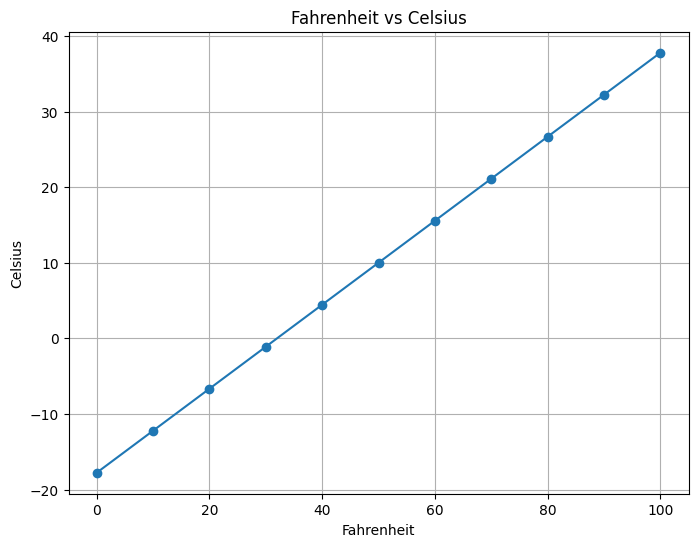

In [10]:
#Title : Project 7 Machine Learning
#Name :- Pranali Baban Dhobale
#Date :- 2/22/2024


#Import Libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



#Part 1 - Creating a Straight Line Chart
#Define a function to convert Fahrenheit to Celsius
celsius_converter = lambda fahrenheit: 5/9 * (fahrenheit - 32)

#Generate data points for Fahrenheit and their corresponding Celsius values
fahrenheit_temps = [(f, celsius_converter(f)) for f in range(0, 101, 10)]

#Convert the data into a DataFrame
temps_df = pd.DataFrame(fahrenheit_temps, columns=['Fahrenheit', 'Celsius'])

#Plot Fahrenheit vs Celsius
plt.figure(figsize=(8, 6))
plt.plot(temps_df['Fahrenheit'], temps_df['Celsius'], marker='o')
plt.xlabel('Fahrenheit')
plt.ylabel('Celsius')
plt.title('Fahrenheit vs Celsius')
plt.grid(True)
plt.show()

In [5]:
#Part 2 - Predicting Average High Temperature in NYC in January
#Section 1 - Data Acquisition
#Load the NYC temperature data
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

#Section 2 - Data Inspection

#Display first 5 years of data
print("First 5 years of data:")
print(nyc.head())

#Display last 5 years of data
print("\nLast 5 years of data:")
print(nyc.tail())

#Section 3 - Data Cleaning
#Rename 'Values' column to 'Temperature'
nyc.rename(columns={'Value': 'Temperature'}, inplace=True)

#Generate descriptive statistics for temperature data
print("\nDescriptive Statistics for Temperature:")
print(nyc['Temperature'].describe())


#Section 5 - Building the Model
#Calculate regression slope and intercept
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(nyc.index, nyc['Temperature'])


#Section 6 - Predictions
#Predict average high temperature for 2024 and 1890


temp_2024 = slope * 2024 + intercept
temp_1890 = slope * 1890 + intercept

print(f"\nPredicted average high temperature for January 2024: {temp_2024:.2f} F")
print(f"Predicted average high temperature for January 1890: {temp_1890:.2f} F")

First 5 years of data:
     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

Last 5 years of data:
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3

Descriptive Statistics for Temperature:
count    124.000000
mean      37.595161
std        4.539848
min       26.100000
25%       34.575000
50%       37.600000
75%       40.600000
max       47.600000
Name: Temperature, dtype: float64

Predicted average high temperature for January 2024: 66.58 F
Predicted average high temperature for January 1890: 64.60 F


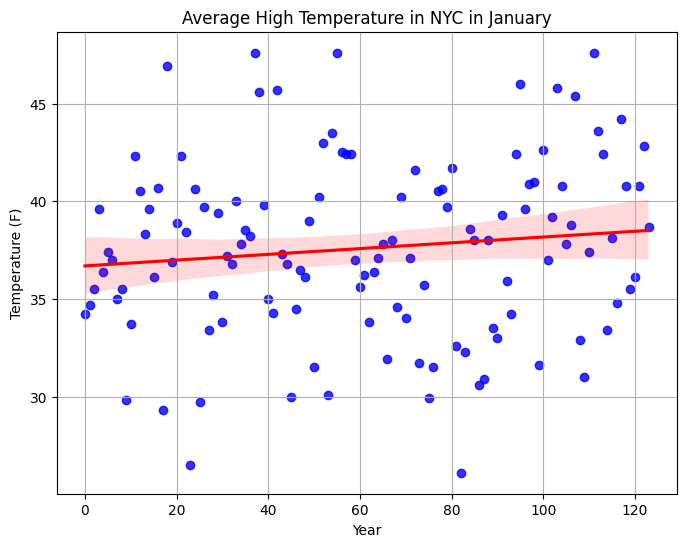

LinearRegression()

In [15]:
#Section 7 - Visualizations
#Create a regression plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



plt.figure(figsize=(8, 6))
sns.regplot(x=nyc.index, y=nyc['Temperature'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.title('Average High Temperature in NYC in January')
plt.grid(True)
plt.show()


#Part 3 - Predict Average High Temp in NYC in January

#Section 1 - Building the Model
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(nyc.index.values.reshape(-1, 1), nyc['Temperature'].values, random_state=11)


#Section 2 - Testing the Model
#Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


Some predicted vs expected values:
Predicted: 37.86, Expected: 31.70
Predicted: 36.48, Expected: 35.50
Predicted: 37.93, Expected: 40.50
Predicted: 36.61, Expected: 29.80
Predicted: 36.75, Expected: 40.70
Predicted: 38.69, Expected: 34.80
Predicted: 36.44, Expected: 34.20
Predicted: 37.14, Expected: 38.20
Predicted: 37.62, Expected: 36.20
Predicted: 37.53, Expected: 42.50
Predicted: 37.00, Expected: 39.40
Predicted: 38.32, Expected: 40.90
Predicted: 37.20, Expected: 39.80
Predicted: 38.46, Expected: 40.80
Predicted: 36.56, Expected: 37.00
Predicted: 37.25, Expected: 45.70
Predicted: 38.18, Expected: 33.00
Predicted: 37.89, Expected: 29.90
Predicted: 38.15, Expected: 38.00
Predicted: 38.63, Expected: 42.40
Predicted: 38.05, Expected: 32.30
Predicted: 37.02, Expected: 33.80
Predicted: 37.12, Expected: 38.50
Predicted: 37.70, Expected: 37.80
Predicted: 36.73, Expected: 36.10
Predicted: 37.64, Expected: 33.80
Predicted: 37.56, Expected: 42.40
Predicted: 38.11, Expected: 30.60
Predicted: 3

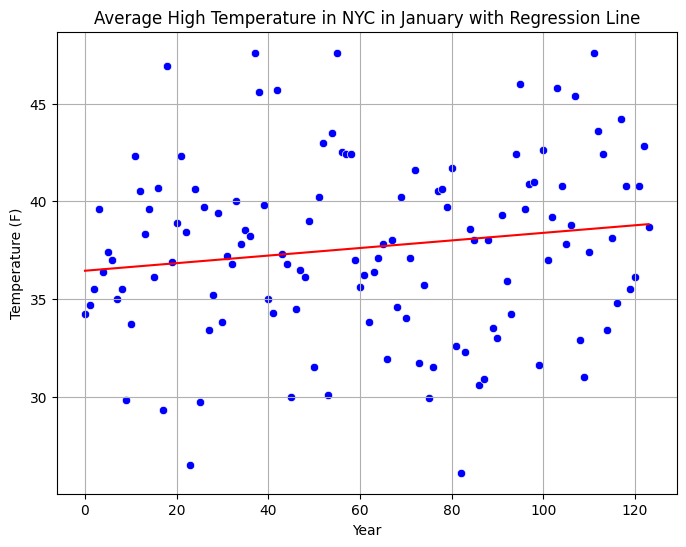

In [16]:
import numpy as np

y_pred = model.predict(X_test)

#Display some predicted vs expected values
print("\nSome predicted vs expected values:")
for i in range(len(y_pred)):
    print(f"Predicted: {y_pred[i]:.2f}, Expected: {y_test[i]:.2f}")


#Section 3 - Predictions
#Function to predict future temperatures
def predict_temperature(model, year):
 return model.predict(np.array([[year]]))[0]

#Predict temperatures for 2024 and 1890
temp_2024 = predict_temperature(model, 2024)
temp_1890 = predict_temperature(model, 1890)

print(f"\nPredicted average high temperature for January 2024: {temp_2024:.2f} F")
print(f"Predicted average high temperature for January 1890: {temp_1890:.2f} F")


#Section 4 - Visualizations
#Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=nyc.index, y=nyc['Temperature'], color='blue')
plt.plot(nyc.index, model.predict(nyc.index.values.reshape(-1, 1)), color='red')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.title('Average High Temperature in NYC in January with Regression Line')
plt.grid(True)
plt.show()

In [17]:
#Part 4 - Method Comparison
#Method Comparison Summary
print("\nMethod Comparison Summary:")
print("Linear Regression Method:")
print(f" - Predicted average high temperature for January 2024: {temp_2024:.2f} F")
print(f" - Predicted average high temperature for January 1890: {temp_1890:.2f} F")


Method Comparison Summary:
Linear Regression Method:
 - Predicted average high temperature for January 2024: 75.69 F
 - Predicted average high temperature for January 1890: 73.09 F



California Housing Dataset Description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from t

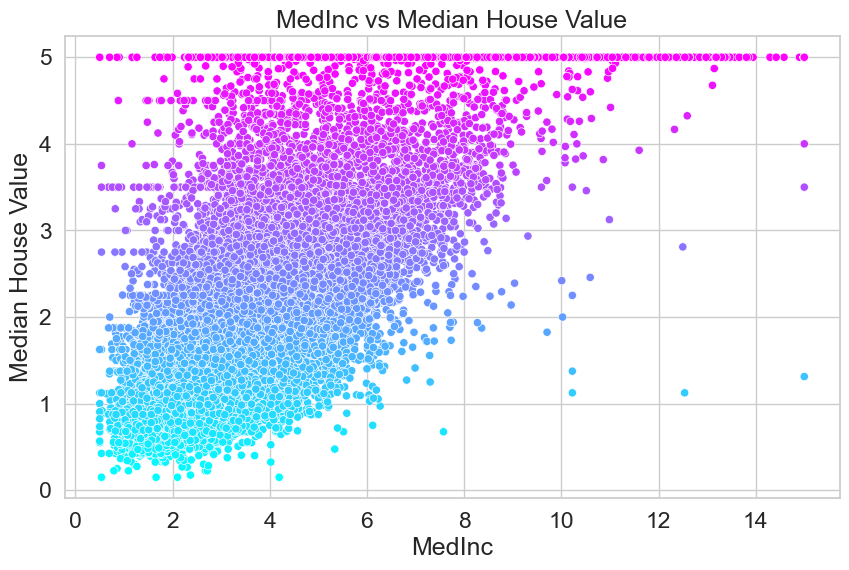

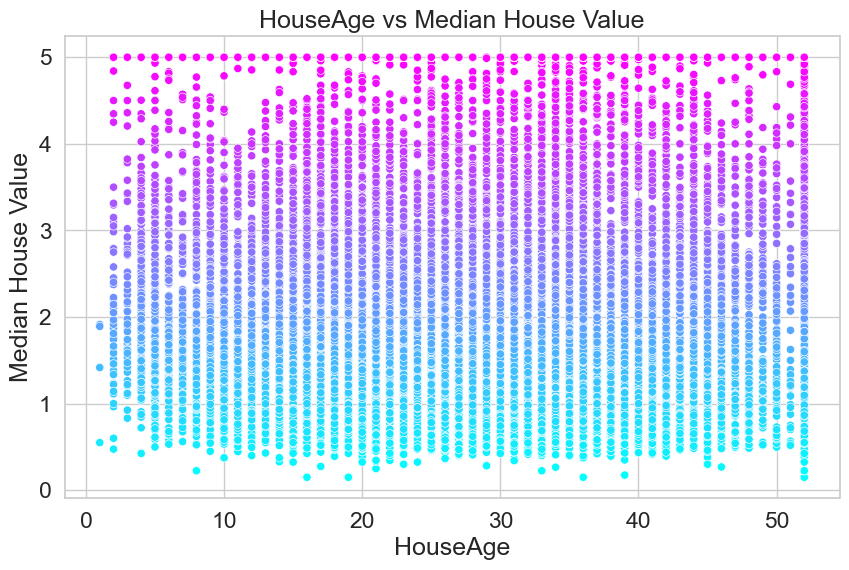

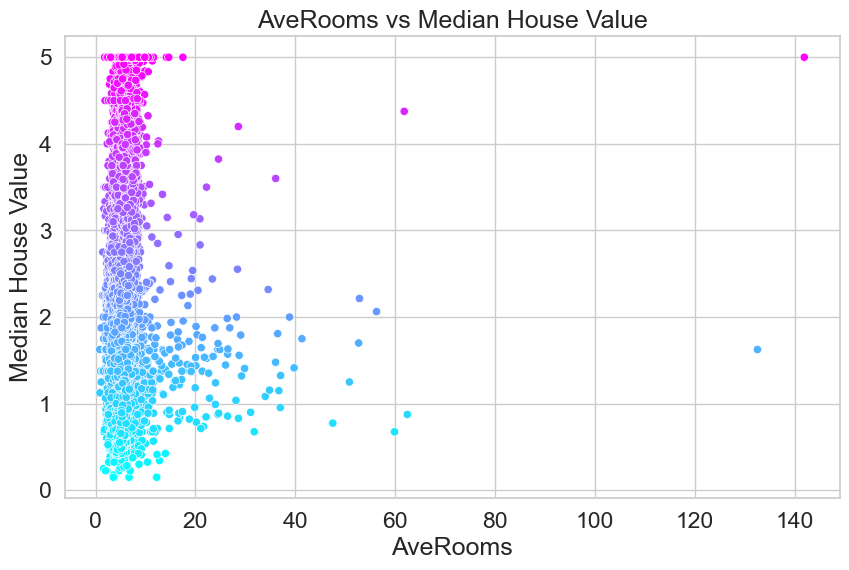

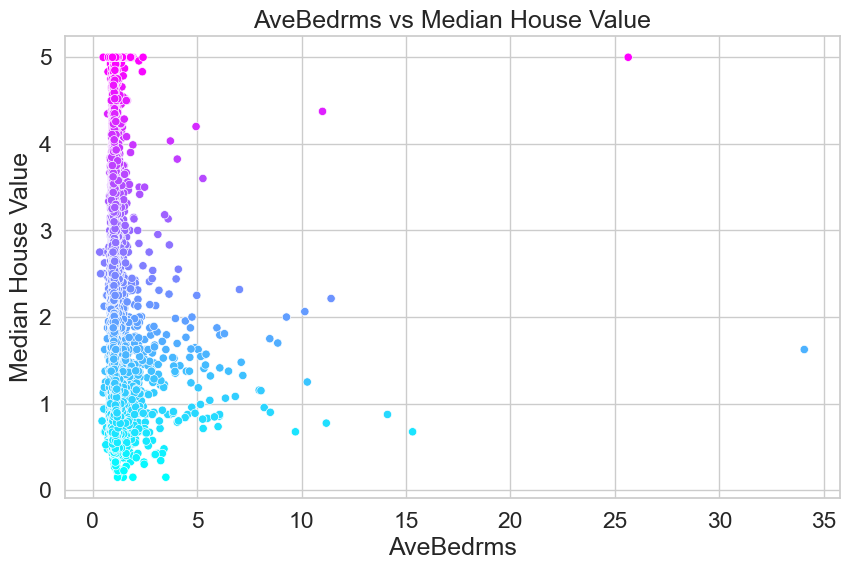

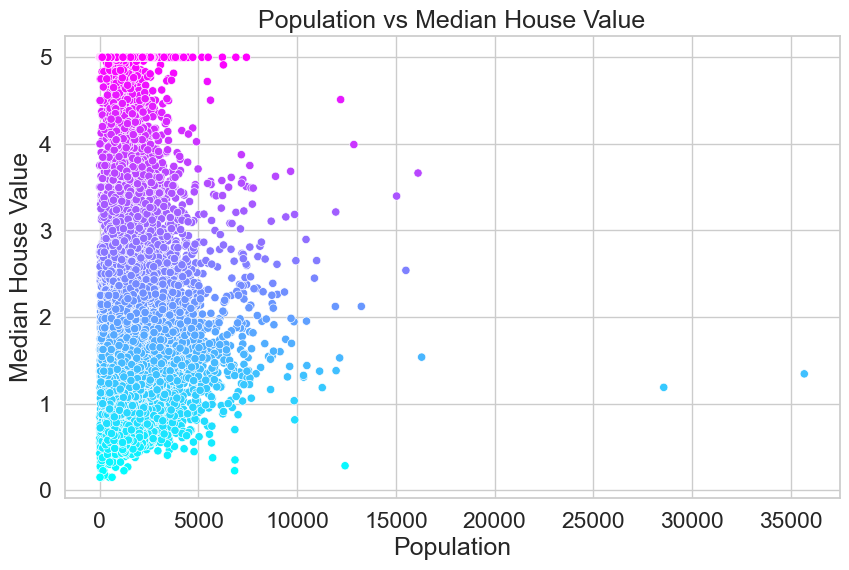

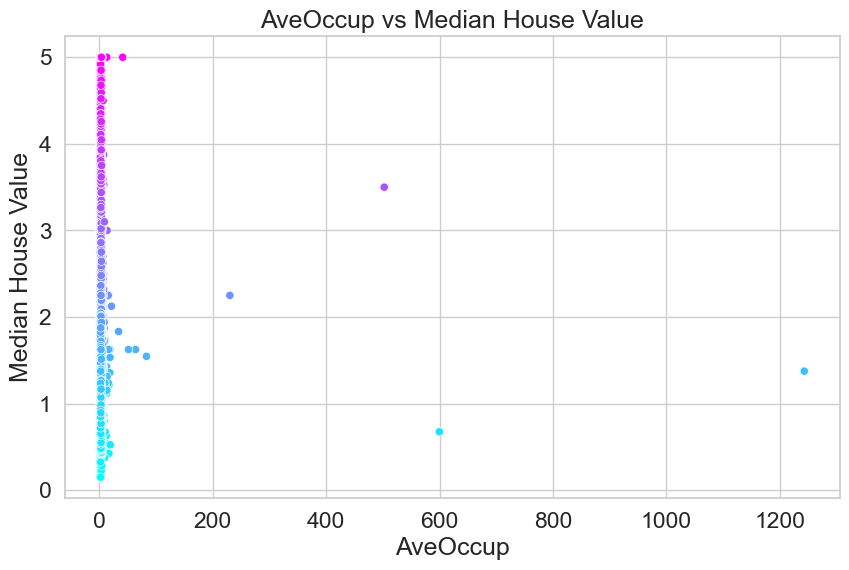

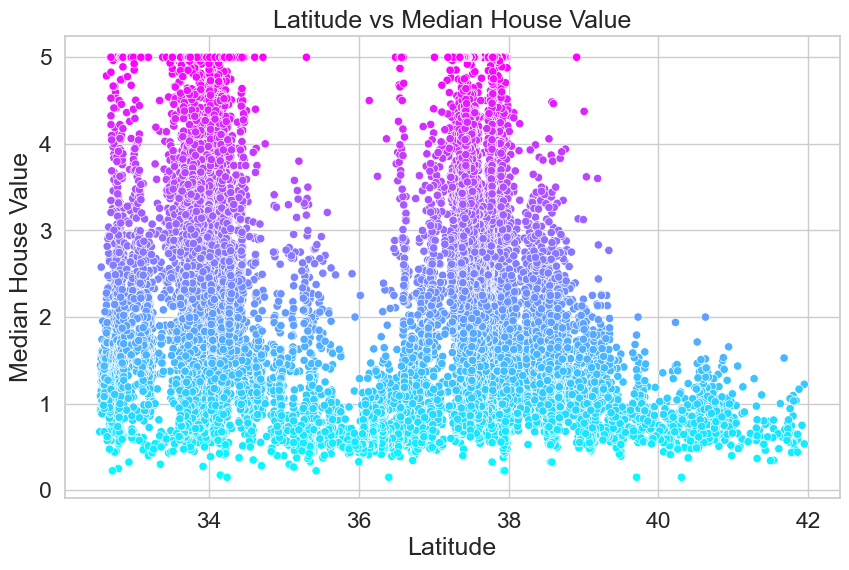

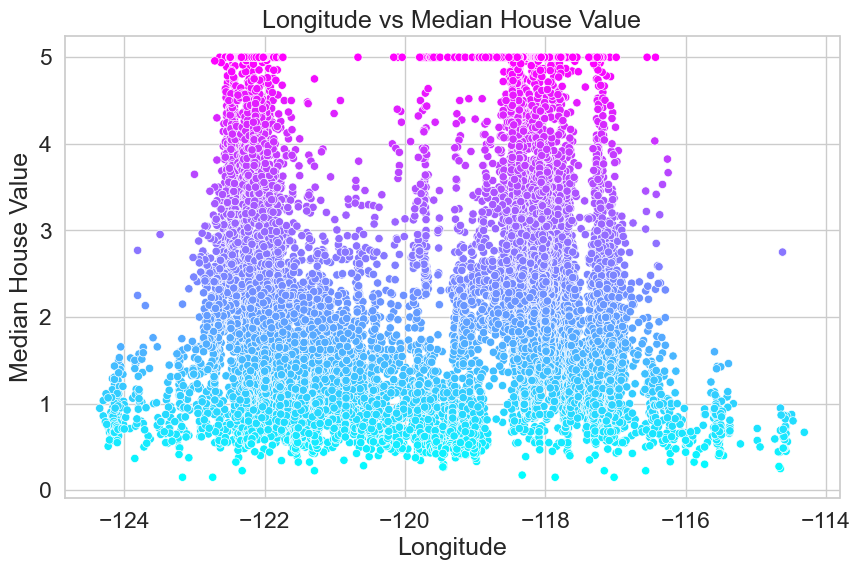

In [25]:
#Bonus
#Part 5 - Bonus: California Housing Data
#Load California housing data
from sklearn.datasets import fetch_california_housing


california = fetch_california_housing()

#Display dataset information
print("\nCalifornia Housing Dataset Description:")
print(california.DESCR)

#Convert data to DataFrame
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseValue'] = california.target

#Explore data using Pandas
print("\nSnapshot of California Housing Data:")
print(california_df.head())

#Descriptive statistics
print("\nDescriptive Statistics for California Housing Data:")
print(california_df.describe())

#Visualizations of Features
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

for feature in california.feature_names:
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=california_df, x=feature, y='MedHouseValue', hue='MedHouseValue', palette='cool', legend=False)
    plt.title(f"{feature} vs Median House Value")
    plt.xlabel(feature)
    plt.ylabel("Median House Value")
    plt.grid(True)
    plt.show()



Coefficients:
MedInc: 0.43770302153821994
Intercept: -36.88295065605552
HouseAge: 0.009216834565797714
Intercept: -36.88295065605552
AveRooms: -0.10732526637360959
Intercept: -36.88295065605552
AveBedrms: 0.611713307391809
Intercept: -36.88295065605552
Population: -5.756822009305621e-06
Intercept: -36.88295065605552
AveOccup: -0.003384566465716424
Intercept: -36.88295065605552
Latitude: -0.4194818609649074
Intercept: -36.88295065605552
Longitude: -0.4337713349874022
Intercept: -36.88295065605552


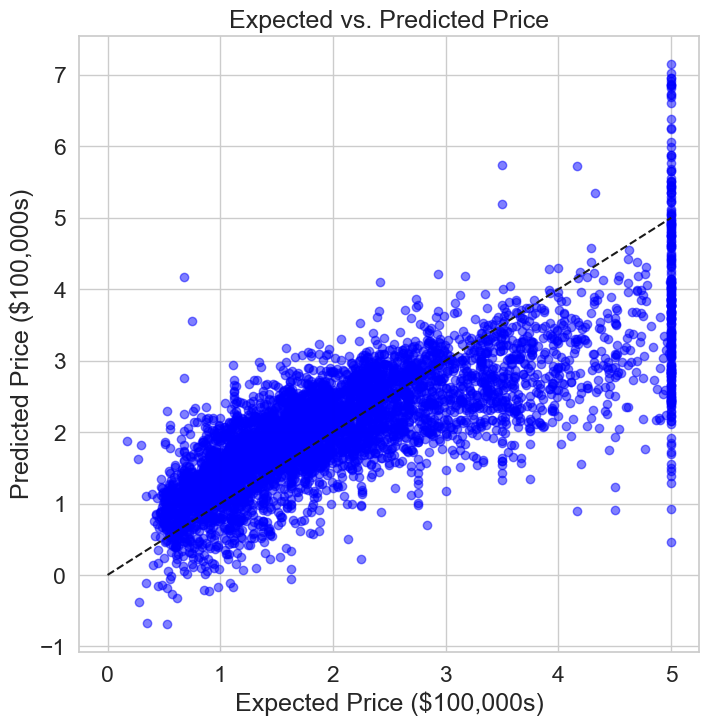

In [28]:
#Splitting the Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)

#Train Linear Regression Model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

#Print coefficients
print("\nCoefficients:")
for i, name in enumerate(california.feature_names):
    print(f"{name}: {linear_regression.coef_[i]}")
    print(f"Intercept: {linear_regression.intercept_}")

#Test the Model
predicted = linear_regression.predict(X_test)

#Visualize Expected vs. Predicted Price
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predicted, c='blue', alpha=0.5)
plt.plot([0, 5], [0, 5], '--k')
plt.xlabel('Expected Price ($100,000s)')
plt.ylabel('Predicted Price ($100,000s)')
plt.title('Expected vs. Predicted Price')
plt.grid(True)
plt.show()